*Library*

In [1]:
from numpy.random._examples.cffi.extending import rng
from sklearn.datasets import fetch_olivetti_faces

Exercise 1
We want to perform PCA on a classical dataset : the Olivetti faces dataset.

Import the dataset using the function: ```fetch olivetti faces ```

In [2]:
from sklearn.datasets import fetch_olivetti_faces
from numpy.random import RandomState

image_data = fetch_olivetti_faces()


Center the faces

In [3]:
faces = image_data.data
faces_centered = faces - faces.mean(axis=0)
faces_centered

array([[-0.09021699, -0.06646687, -0.05892554, ..., -0.1685228 ,
        -0.15248989, -0.15342984],
       [ 0.05441111,  0.03683892,  0.0361158 , ..., -0.1685228 ,
        -0.16075435, -0.15756208],
       [-0.08195254, -0.033409  ,  0.01545465, ..., -0.1809195 ,
        -0.16488658, -0.15756208],
       ...,
       [ 0.09986565,  0.09882241,  0.13115713, ..., -0.14372942,
        -0.16488658, -0.120372  ],
       [-0.18525833, -0.21522719, -0.25727263, ...,  0.2529648 ,
         0.27726215,  0.29285112],
       [ 0.11639455,  0.02857447, -0.19528916, ...,  0.03808877,
         0.04172498,  0.07384288]], dtype=float32)

We now plot the faces

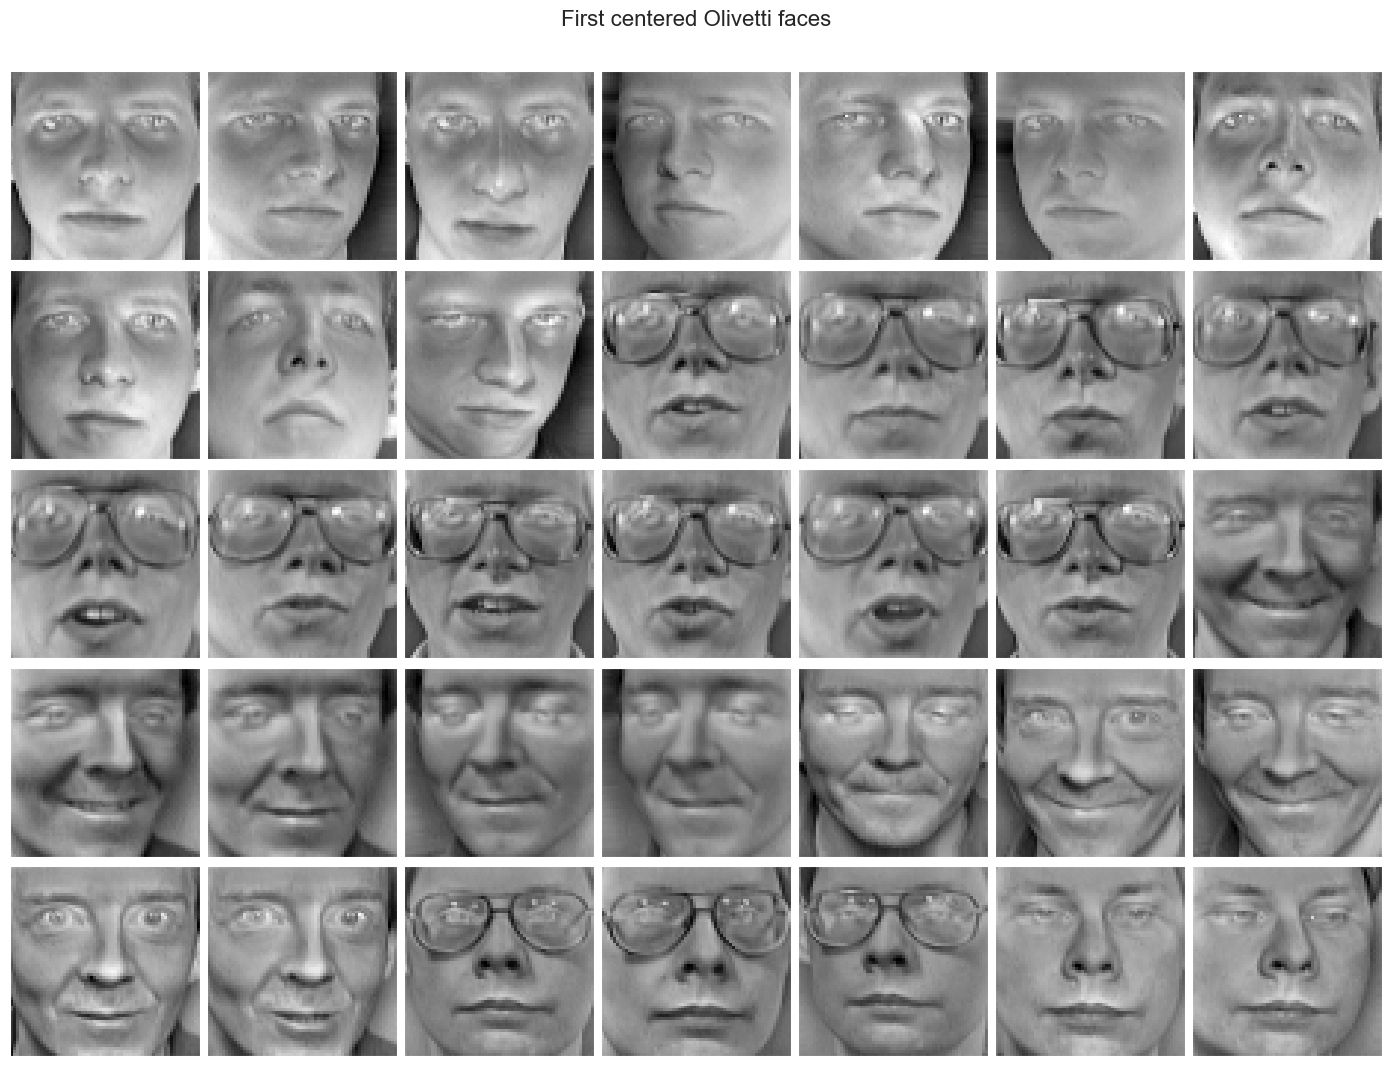

In [4]:
import numpy as np
import matplotlib.pyplot as plt
n_row, n_col = 5, 7
n_components = n_row * n_col
image_shape = (64,64)

def plot_gallery(title, images):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

# Plot a sample of the input data
plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

Exercise 2
Word embeddding is mapping allowing to represent each word of a given vocabulary by means
of a high-dimensional numerical vector (around hundred of components).
The idea is that word embeddings should encode the semantic (i.e. the sense of the
words). It means that when two words that have close meaning, their representation should
be close also : the euclidean distance between their embeddings should be small. For example
mom and dad should be closer than socket and dad.
1

To understand more about words embeddings, and see how we can visualize clusters of words
how we can visualize word clusters, we shall combine Word2Vec representation and t-SNE.
To do so we shall use gensim Python library and begin to import the following Python
librairies

In [5]:
import numpy as np
import gensim.downloader
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy import linalg as LA

The embeddings can be downloaded using the following command

In [6]:
word2vec = gensim.downloader.load("word2vec-google-news-300")

We first play with word embeddings to understand more:

Calculate the word embedding of the word Paris,London. What is the shape of this vector?

In [7]:
emb_paris=word2vec["Paris"]
emb_london=word2vec["London"]
emb_twitter=word2vec["twitter"]

We now display the 30 most similar words to the word Paris using the function
```most_similar ``` Comment both the result and the format of the output

In [8]:
word2vec.most_similar(["Paris"], restrict_vocab=30 )

[('####', 0.16726364195346832),
 ('in', 0.12620140612125397),
 ('at', 0.1154865249991417),
 ('##', 0.10693623125553131),
 ('the', 0.09986186027526855),
 ('or', 0.09969434887170792),
 ('from', 0.09689956903457642),
 ('on', 0.09516863524913788),
 ('this', 0.09268441051244736),
 ('by', 0.09221064299345016)]

Comment:

To understand more how word embeddings encode semantic, we calculate also
the word embedding of the two words London and twitter. Calculate the cosine
similarity of (Paris,London) and thereafter that of (Paris,twitter) where

In [9]:
cosine_sim_Paris_London=(np.dot(emb_paris,emb_london))/(LA.norm(emb_paris)*LA.norm(emb_london))
cosine_sim_Paris_London

0.5289871

In [10]:
cosine_sim_Paris_Twitter=(np.dot(emb_paris,emb_twitter))/(LA.norm(emb_paris)*LA.norm(emb_twitter))
cosine_sim_Paris_Twitter

0.07653202

We now create synthetic data, naturally associated to clusters.

In [11]:
keys = ["Paris", "Python","Sunday","Tolstoy","Twitter" ,"bachelor" ,"delivery" ,
"election","expensive" , "experience" ,"financial" ,"food" ,"iOS" ,"peace","release","war"]

In [23]:
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, similarity in word2vec.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(word2vec[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)


In [24]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
print([n,m,k])

[16, 30, 300]


The object embedding_clusters is a tridimensional tensor. It can not be a direct input for the PCA algorithm of scikit-learn

We now use PCA with two components on our synthetic clusters

Perform PCA on the synthetic dataset embedding clusters:

In [25]:
from sklearn.decomposition import PCA
pca_model_in_2d = PCA(n_components=2)
input_pca = embedding_clusters.reshape(n*m,k)

In [26]:
transformed_input_after_pca = pca_model_in_2d.fit_transform(input_pca)
transformed_input_after_pca.shape

(480, 2)

In [27]:
def plot_similar_words(title,labels, embedding_clusters, word_clusters):
    plt.figure(figsize=(16,9))
    colors = cm.rainbow(np.linspace(0,1,len(labels)))
    for label, embeddings, words, color in zip(labels,embedding_clusters,word_clusters,colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x,y,c=color, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5,2),textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    plt.show()

In [17]:
# embeddings_tsne_in_2d.expalined_variance_ratio_

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

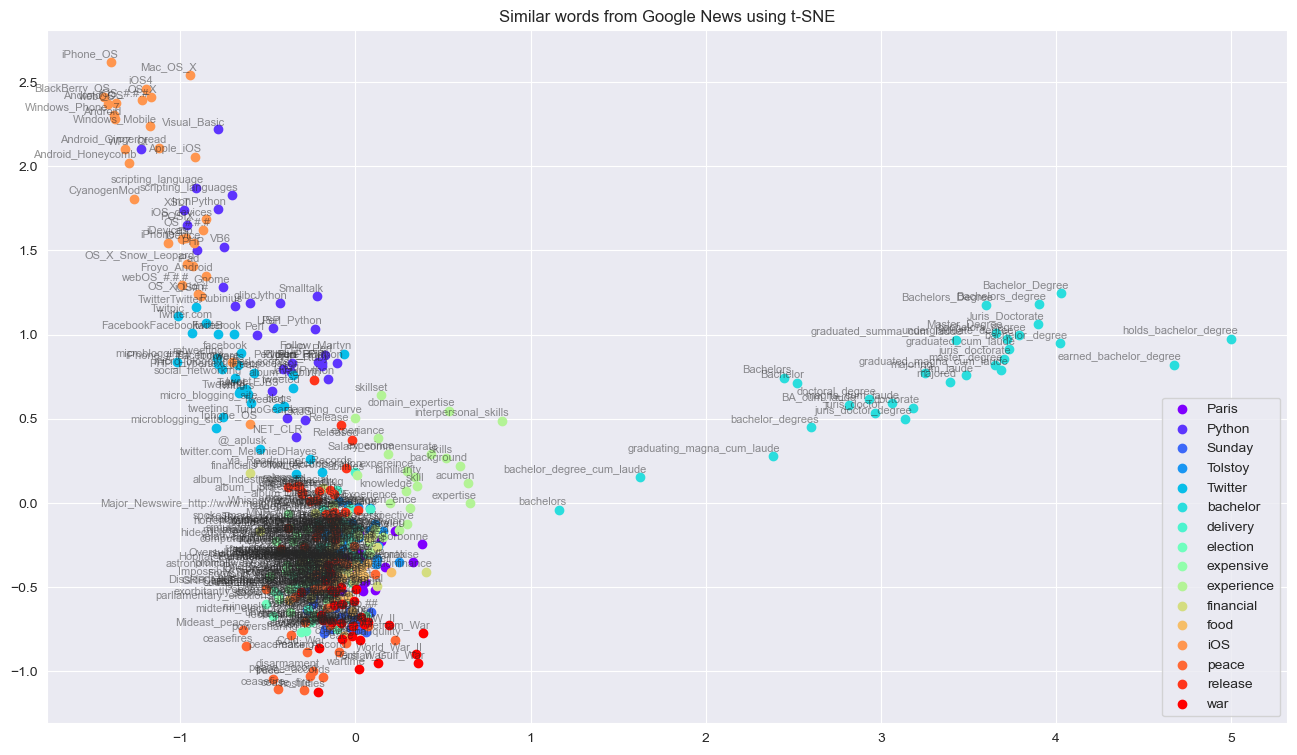

In [29]:
embeddings_pca_in_2d = transformed_input_after_pca
embeddings_pca_in_2d = np.array(embeddings_pca_in_2d).reshape(n,m,2)
plot_similar_words(
    "Similar words from Google News using t-SNE",
    keys,
    embeddings_pca_in_2d,
    word_clusters
)

tSNE: getting the data (y1,y2,...ym) of small dimension space les une des autees comment le sont les données)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if yo

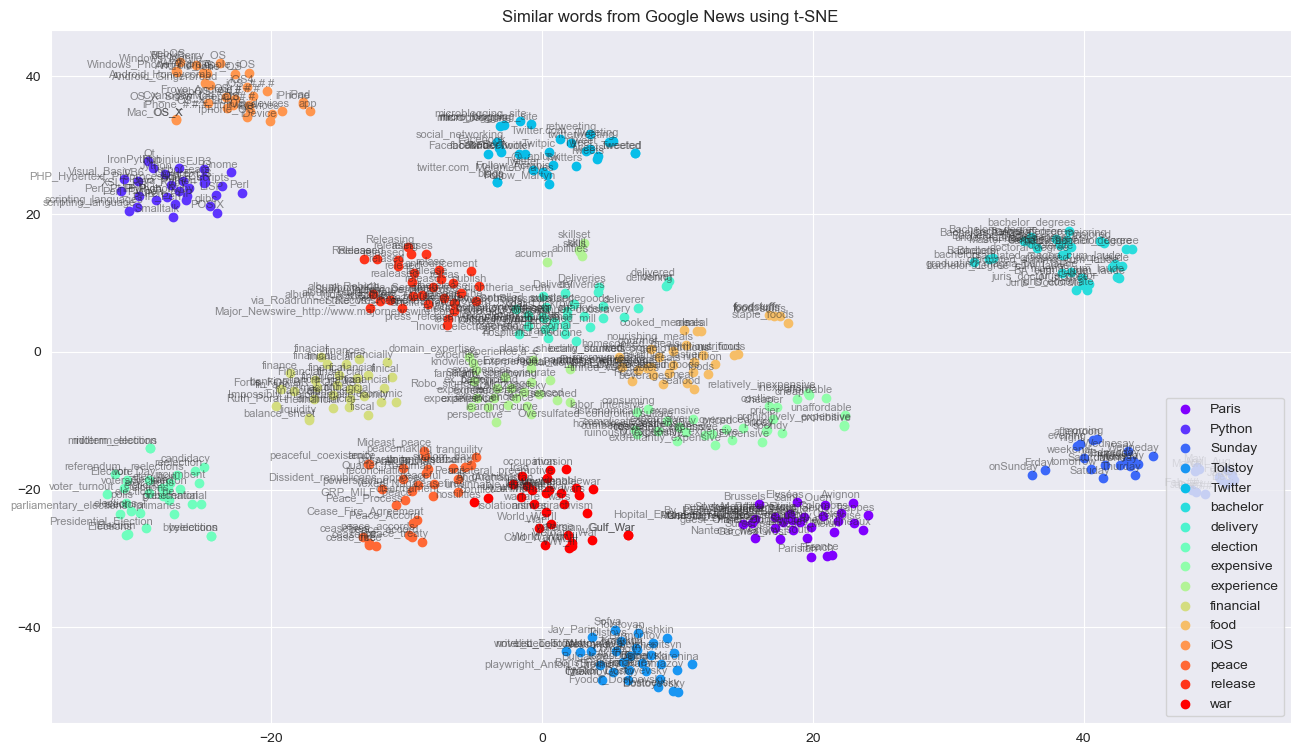

In [34]:
from sklearn.manifold import TSNE
import numpy as np
tsne_model_in_2d = TSNE(perplexity=15,
                        n_components=2,
                        init='pca',
                        n_iter=3500,
                        random_state=32)
embeddings_tsne_in_2d = tsne_model_in_2d.fit_transform(embedding_clusters.reshape(n*m,k))
embeddings_tsne_in_2d = np.array(embeddings_tsne_in_2d).reshape(n,m,2)
plot_similar_words(
    "Similar words from Google News using t-SNE",
    keys,
    embeddings_tsne_in_2d,
    word_clusters
)